# Comparision among Coutries

### Imports and Reading Data

In [7]:
# Import Essentials Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load Cleaned Data

In [6]:
benin_df = pd.read_csv('../data/benin_clean.csv')
togo_df = pd.read_csv('../data/togo_clean.csv')
sierraleone_df = pd.read_csv('../data/sierraleone_clean.csv')

### Add a Country column to each

In [8]:
benin_df['Country'] = 'Benin'
togo_df['Country'] = 'togo'
sierraleone_df['Country'] = 'sierraleone'

In [9]:
df_all = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

## 1. Metric Comparison

Boxplots for GHI, DNI, DHI by country

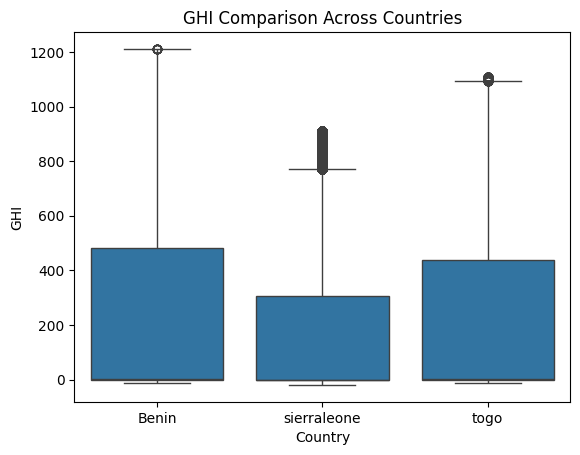

In [10]:
import seaborn as sns
sns.boxplot(x='Country', y='GHI', data=df_all)
plt.title('GHI Comparison Across Countries')
plt.show()

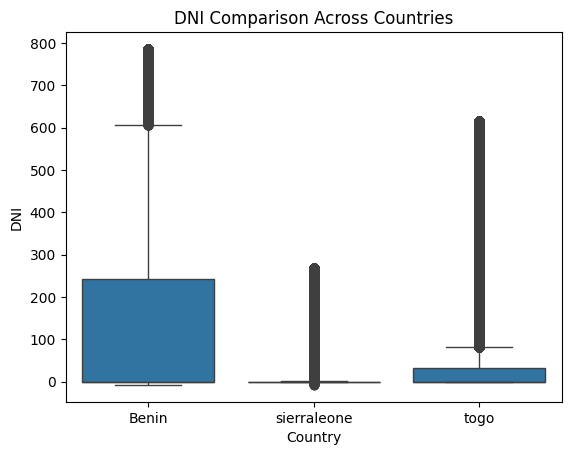

In [11]:
sns.boxplot(x='Country', y='DNI', data=df_all)
plt.title('DNI Comparison Across Countries')
plt.show()

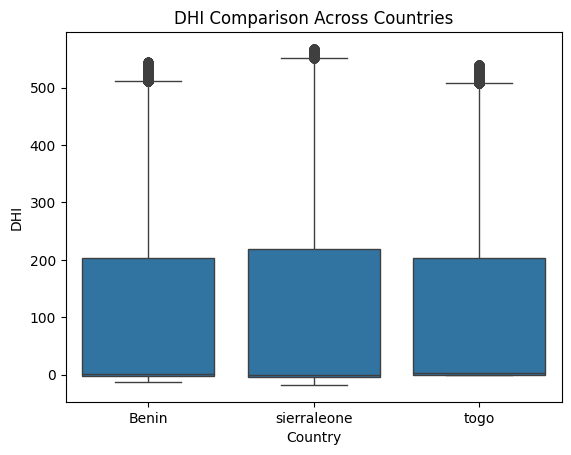

In [12]:
sns.boxplot(x='Country', y='DHI', data=df_all)
plt.title('DHI Comparison Across Countries')
plt.show()

## 2. Summary table (mean, median, std)

In [13]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
print(summary)

                    GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        240.200246    1.8  330.707193  143.013314   -0.1  236.119136   
sierraleone  171.584956    0.3  263.829552   13.680672   -0.1   45.428927   
togo         227.659873    2.1  319.301438   80.572452    0.0  163.852645   

                    DHI                     
                   mean median         std  
Country                                     
Benin        105.543362    1.6  146.634211  
sierraleone  108.544219   -0.1  152.330897  
togo         107.644774    2.5  145.793970  


## 3. Statistical Testing

If p < 0.05, differences are significant. Note in markdown

In [22]:
from scipy.stats import f_oneway
ghi_benin = benin_df['GHI']
ghi_sierra = sierraleone_df['GHI']
ghi_togo = togo_df['GHI']
stat, p = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f'ANOVA p-value: {p}')

ANOVA p-value: 0.0


In [23]:
dhi_benin = benin_df['DHI']
dhi_sierra = sierraleone_df['DHI']
dhi_togo = togo_df['DHI']
stat, p = f_oneway(dhi_benin, dhi_sierra, dhi_togo)
print(f'ANOVA p-value: {p}')

ANOVA p-value: 2.3931148637499685e-25


In [24]:
dni_benin = benin_df['DNI']
dni_sierra = sierraleone_df['DNI']
dni_togo = togo_df['DNI']
stat, p = f_oneway(dni_benin, dni_sierra, dni_togo)
print(f'ANOVA p-value: {p}')

ANOVA p-value: 0.0


## 4. Key Observations

* Benin has the highest median GHI at approximately 400, indicating strong solar potential.
* Togo shows high variability in DNI with a wide IQR and whiskers extending beyond 600, suggesting unstable direct sunlight.
* Sierra Leone has consistent DHI with a median around 200 and moderate variability, good for diffuse radiation applications.

## 5. Bar chart of average GHI, DNI and DHI by country

### 5.1 Bar chart of average GHI by country

<Axes: title={'center': 'Average GHI by Country'}, xlabel='Country'>

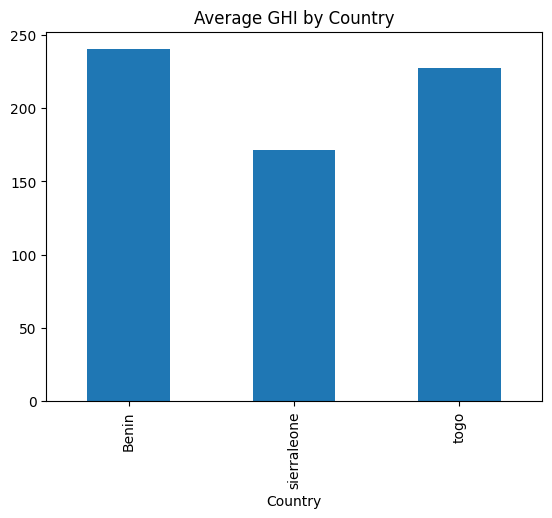

In [18]:
df_all.groupby('Country')['GHI'].mean().plot(kind='bar', title='Average GHI by Country')

### 5.2 Bar chart of average DNI by country

<Axes: title={'center': 'Average DNI by Country'}, xlabel='Country'>

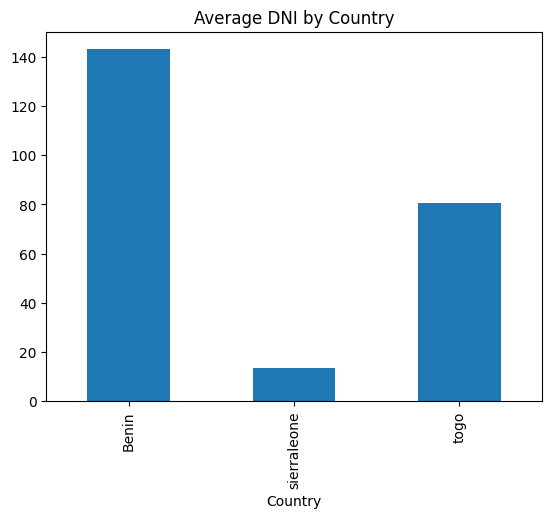

In [21]:
df_all.groupby('Country')['DNI'].mean().plot(kind='bar', title='Average DNI by Country')

### 5.3 Bar chart of average DHI by country

<Axes: title={'center': 'Average DHI by Country'}, xlabel='Country'>

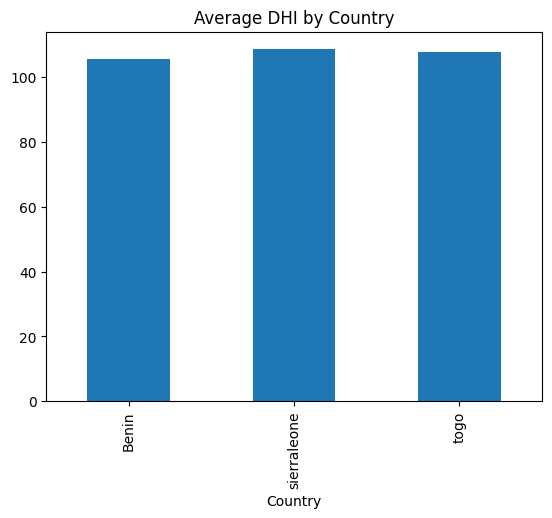

In [19]:
df_all.groupby('Country')['DHI'].mean().plot(kind='bar', title='Average DHI by Country')

# Conclusion:
* Benin stands out as the most promising location for solar energy projects, with the highest average GHI (250) and DNI (140), reflecting strong overall solar potential and direct sunlight availability, ideal for concentrated solar power systems.
* Togo offers a balanced solar profile with a good average GHI (200) and moderate DNI (80), making it a viable option for solar energy, though less intense than Benin, suitable for both photovoltaic and hybrid systems.
* Sierra Leone has the lowest solar potential among the three, with a moderate GHI (150) and very low DNI (20), but consistent DHI (100), suggesting it is better suited for applications relying on diffuse radiation, such as small-scale photovoltaic systems in cloudy conditions.